# Training - One sample

In [2]:
import numpy as np
import torch

In [3]:
# Tải file data
!gdown --id 1O8q12g0VnWlu3ZZJvJdL1siWJqgpmzsI

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1O8q12g0VnWlu3ZZJvJdL1siWJqgpmzsI
To: /content/data.csv
100% 31.0/31.0 [00:00<00:00, 51.5kB/s]


In [4]:
### Data preparation
data = np.genfromtxt('data.csv', delimiter=',')
X = torch.tensor(data[:,0:1], dtype = torch.float64, requires_grad=True)
y = torch.tensor(data[:,1:],  dtype = torch.float64,  requires_grad=True)
N = X.shape[0]

X = torch.cat((torch.ones((N, 1)), X), dim = 1)

print(X)
print(y)

NameError: ignored

In [5]:
# theta [b, W]
theta = torch.tensor([[0.04], 
                     [-0.34]], requires_grad=True, dtype=torch.float64)
print(theta)

# forward
def compute_output(X, theta):
  return torch.transpose(theta, 0, 1)@X

# some params
lr = 0.01
epochs = 100
losses = []

In [6]:
for x_data, y_data in zip(X, y): 
  print(x_data)
  x_data = torch.reshape(x_data, (2,1))
  print(x_data.shape)
  break

tensor([1.0000, 6.7000], dtype=torch.float64, grad_fn=<UnbindBackward0>)
torch.Size([2, 1])


In [8]:
from torch._C import dtype
# training
for epoch in range(epochs):
    for x_data, y_data in zip(X, y):        
        # reshape -> (2,1)
        x_data = torch.reshape(x_data, (2,1))
        #print(x_data)
        
        # y_hat
        y_hat = compute_output(theta, x_data)

        # loss       
        loss = torch.square(y_hat - y_data)
        #print(loss)
    
        # debug
        losses.append(loss.item())
        #print(losses)
        # gradient        
        loss.backward()
        
        with torch.no_grad():
          # update
          theta -= lr*theta.grad
          #print(theta)
          theta.grad.zero_()

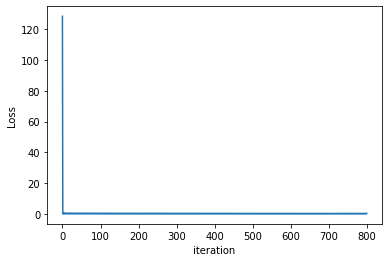

In [9]:
import matplotlib.pyplot as plt

# plot losses
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

# Training - N samples

In [13]:
### Data preparation
data = np.genfromtxt('data.csv', delimiter=',')
X = torch.tensor(data[:,0:1], dtype = torch.float64, requires_grad=True)
y = torch.tensor(data[:,1:],  dtype = torch.float64,  requires_grad=True)
N = X.shape[0]

X = torch.cat((torch.ones((N, 1)), X), dim = 1)

print(X)
print(y)

tensor([[1.0000, 6.7000],
        [1.0000, 4.6000],
        [1.0000, 3.5000],
        [1.0000, 5.5000]], dtype=torch.float64, grad_fn=<CatBackward0>)
tensor([[9.1000],
        [5.9000],
        [4.6000],
        [6.7000]], dtype=torch.float64, requires_grad=True)


In [14]:
# theta [b, W]
theta = torch.tensor([[0.04], 
                     [-0.34]], 
                    dtype=torch.float64, requires_grad=True)

# forward
def compute_output(X, theta):
    return X@theta

# some params
lr = 0.01
epochs = 20
losses = []

In [15]:
# training
for epoch in range(epochs):
    # y_hat
    y_hat = compute_output(X, theta)
    
    # loss
    loss = torch.mean(torch.square(y_hat - y))
                
    # debug
    losses.append(loss.item())
        
    # gradient        
    loss.backward()

    # update
    with torch.no_grad():
      # update
      theta -= lr*theta.grad
      #print(theta)
      theta.grad.zero_()

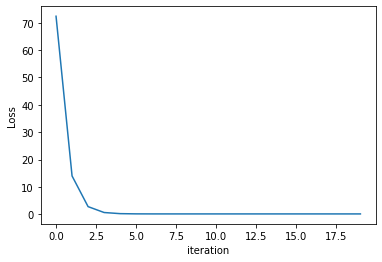

In [16]:
import matplotlib.pyplot as plt

# plot losses
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()